In [72]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
import pickle
os.chdir(r'C:\Users\Dinesh\Documents\Data Science\Project 3 Workbook Bundle\project_files')      

In [6]:
df = pd.read_csv('employee_data.csv')

In [7]:
df.shape

(14249, 10)

In [8]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [10]:
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


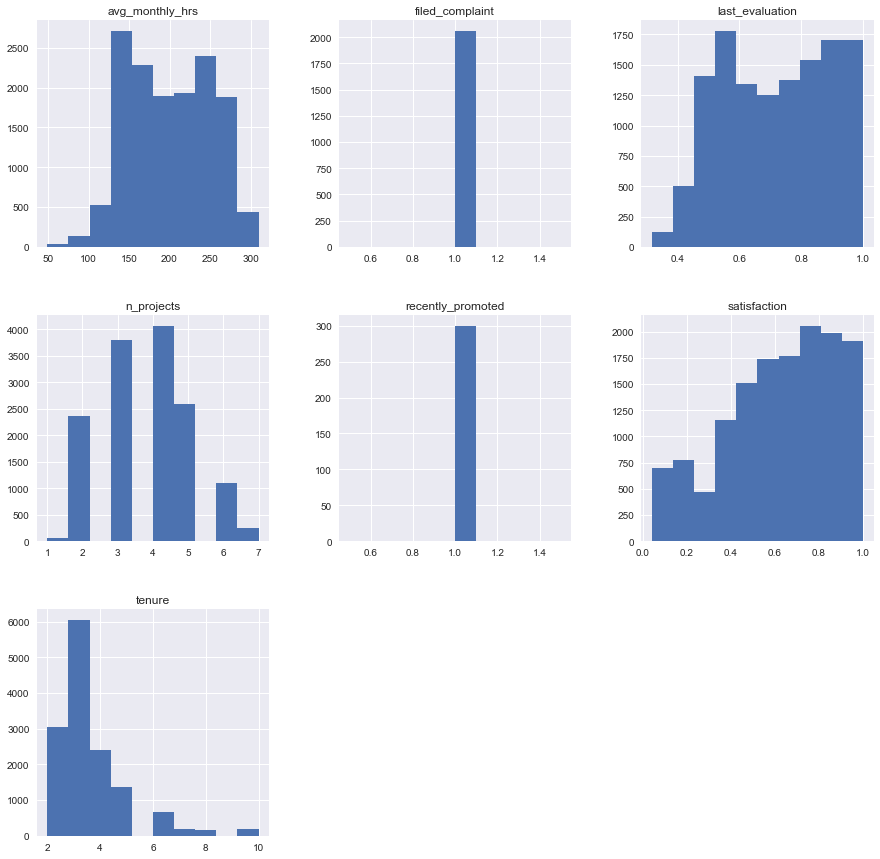

In [11]:
df.hist(figsize=(15,15), grid=True)
plt.show()

In [12]:
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


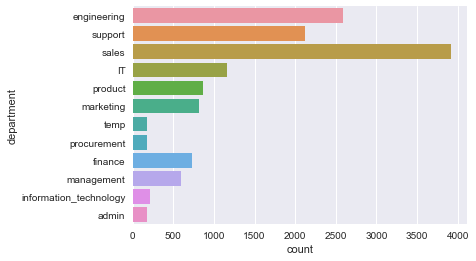

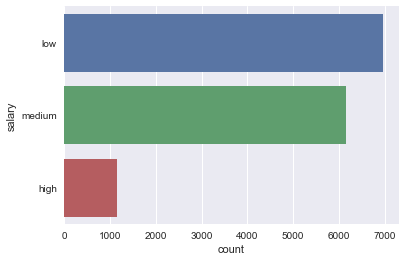

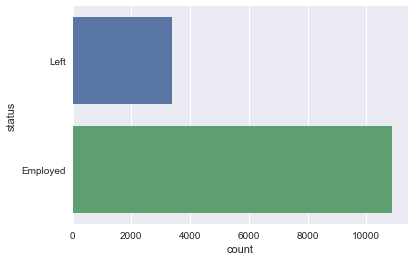

In [13]:
for cat_type in ['department','salary','status']:
    sns.countplot(y=cat_type, data=df)
    plt.show()

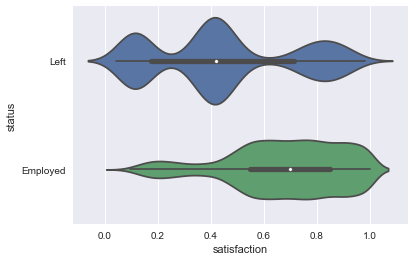

In [14]:
sns.violinplot(y = df.status, x = df.satisfaction)
plt.show()

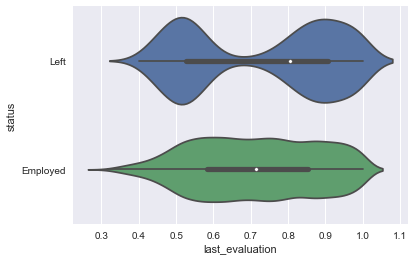

In [15]:
sns.violinplot(y = df.status, x = df.last_evaluation)
plt.show()

In [16]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


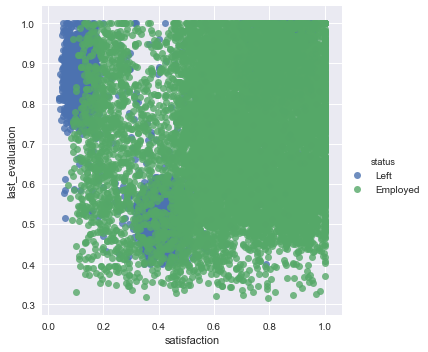

In [17]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction', y='last_evaluation', hue='status', data=df, fit_reg=False)

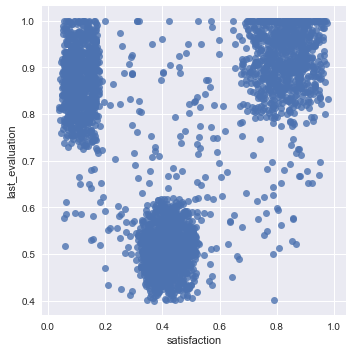

In [18]:
'''"Underperformers: for last_evaluation < 0.6
"Unhappy" for satisfaction_level < 0.2... maybe they are overqualified?
"Overachievers" last_evaluation > 0.8 and satisfaction > 0.7'''
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)

<h2> Data Cleaning </h2>

In [19]:
df = df.drop_duplicates()
df.shape

(14221, 10)

In [20]:
df =df[df.department != 'temp']
df.shape

(14068, 10)

In [21]:
print (df.filed_complaint.unique())
df.filed_complaint = df.filed_complaint.fillna(0)
print (df.recently_promoted.unique())
df.recently_promoted = df.recently_promoted.fillna(0)

[ nan   1.]
[ nan   1.]


In [22]:
df.department = df.department.replace('information_technology','IT')

In [23]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [24]:
df.department.fillna('Missing', inplace=True)
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)
df.last_evaluation.fillna(0, inplace=True)

In [25]:
#Feature engineering based on satisfaction and last_evaulation
df['underperformer'] = ((df.last_evaluation <= 0.6) & (df.last_evaluation_missing == 0)).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)

In [26]:
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

<h3>Save the ABT: Analytical Base Table</h3>

In [27]:
#numeric imputation of the Target variable
df['status'] = pd.get_dummies(df.status).Left
df.status.mean()

0.23933750355416547

In [28]:
df.dtypes

avg_monthly_hrs              int64
department                  object
filed_complaint            float64
last_evaluation            float64
n_projects                   int64
recently_promoted          float64
salary                      object
satisfaction               float64
status                       uint8
tenure                     float64
last_evaluation_missing      int32
underperformer               int32
overachiever                 int32
unhappy                      int32
dtype: object

In [29]:
df = pd.get_dummies(df, columns=['department', 'salary']) 

In [30]:
pd.set_option("display.max_columns" , 100)
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,overachiever,unhappy,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


<h4>Target variable has two classes. 'Left' and 'Employed'. Imputed as 1 and 0. Since we are trying to predict people leaving, 'Left' is tagged as 1 and known as the positive class<h4>

In [37]:
df = pd.read_csv('abt.csv')

In [38]:
y = df.status
X = df.drop('status', axis = 1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234, stratify = df.status)

In [54]:
#Create model pipeline
pipelines = {
'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

In [49]:
#C is the inverse of regularization strength. Higher C is weaker penalties
pipelines['l1'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscal

In [60]:
#Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}

l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}


# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [61]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [62]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')
    

rf has been fitted.
l2 has been fitted.
gb has been fitted.
l1 has been fitted.


In [67]:
for name, model in fitted_models.items():
    print (name, ": ", fitted_models[name].best_score_ )

rf :  0.979562822108
l2 :  0.849386884663
gb :  0.975031100053
l1 :  0.849386884663


FOR BINARY CLASSIFICATION

True positive - Predict 1 when the actual class is 1.
False positive - Predict 1 when the actual class is 0.
True negative - Predict 0 when the actual class is 0.
False negative - Predict 0 when the actual class is 1.

In [74]:
pred = fitted_models['l1'].predict(X_test)
print (confusion_matrix(y_test, pred))

[[1969  172]
 [ 221  452]]


In [99]:
#Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['l1'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Display first 10 predictions
pred[:10]

[0.03057003671401011,
 0.0044422518009578525,
 0.0072962844123991297,
 0.088096005262581809,
 0.07115029758481474,
 0.48161182885628306,
 0.12605228192709095,
 0.61529672120624268,
 0.72666118483058129,
 0.13703586801751205]

ROC Curve is way to visualize the relationship between TPR and FPR

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [102]:
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds}).tail(10)

,FPR,TPR,Thresholds
532,0.759925,0.994056,0.009627
533,0.784680,0.994056,0.008120
534,0.784680,0.995542,0.008077
535,0.910322,0.995542,0.001962
536,0.910322,0.997028,0.001950
537,0.932742,0.997028,0.001393
538,0.932742,0.998514,0.001388
539,0.949089,0.998514,0.001051
540,0.949089,1.000000,0.001040
541,1.000000,1.000000,0.000027


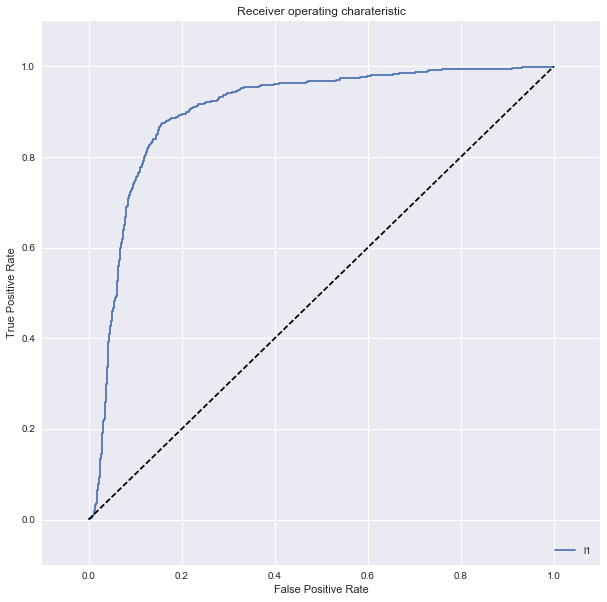

In [104]:
fig = plt.figure(figsize=(10,10))
plt.title('Receiver operating charateristic')

# Plot ROC curve
plt.plot(fpr, tpr, label = 'l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [105]:
#calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

print (auc(fpr,tpr))

0.901539531388


In [108]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    # Get just the prediction for the positive class (1)
    pred = [p[1] for p in pred]
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print (name, auc(fpr,tpr))
    

rf 0.991984831629
l2 0.901538837374
gb 0.988683059741
l1 0.901539531388


In [109]:
with open('final_model.pkl','wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_,f)